# 🎮 Exploratory Data Analysis on Video Game Sales 

## Introduction

In this project, we will analyze video game sales data from North America, Japan, Europe, Africa, and the rest of the world

The source of Data is obtained from *Kaggle* which contains 64,016 titles from the year 1971-2024

## Questions

From the dataset we would like to know:

* Q1: Which title sold the most worldwide?
* Q2: Which year had the highest sales? Has the industry grown over time?
* Q3: Do any consoles seem to specialize in a particular genre?
* Q4: What title are popular in one region but flop in another?

***

## Data Cleaning

### Preparing the Environment

We import all the necessary libraries for the analysis

In [8]:
#import libraries
import matplotlib.pyplot as plt
import pandas as pd

#read csv
df = pd.read_csv('./Datas/vgchartz-2024.csv')

### Exploring the Data

We explore the data based on the shape, data type and other general information

In [9]:
df.head()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


In [10]:
#get the general idea of the data size
df.shape

(64016, 14)

### Dropping Unnecessary Column(s)

The **img** column is unrelated with the data analysis, dropping it will keep the data clean to work with

In [11]:
df.drop(['img', 'publisher', 'developer', 'critic_score', 'last_update'], axis=1, inplace=True)

### Checking Data Types

Check the data types and make sure everything matches to avoid errors and confusion

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         64016 non-null  object 
 1   console       64016 non-null  object 
 2   genre         64016 non-null  object 
 3   total_sales   18922 non-null  float64
 4   na_sales      12637 non-null  float64
 5   jp_sales      6726 non-null   float64
 6   pal_sales     12824 non-null  float64
 7   other_sales   15128 non-null  float64
 8   release_date  56965 non-null  object 
dtypes: float64(5), object(4)
memory usage: 4.4+ MB


Columns **title, console, and genre** needed to be changed to string type and **release_date** as datetime type

In [13]:
df[['title', 'console', 'genre']] = df[['title', 'console', 'genre']].astype('string')
df['release_date'] = df['release_date'].astype('datetime64[us]')

Columns **title, console, and genre** needed to be changed to string type

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         64016 non-null  string        
 1   console       64016 non-null  string        
 2   genre         64016 non-null  string        
 3   total_sales   18922 non-null  float64       
 4   na_sales      12637 non-null  float64       
 5   jp_sales      6726 non-null   float64       
 6   pal_sales     12824 non-null  float64       
 7   other_sales   15128 non-null  float64       
 8   release_date  56965 non-null  datetime64[us]
dtypes: datetime64[us](1), float64(5), string(3)
memory usage: 4.4 MB


### Dealing with Nulls

Verify if there are any nulls in the data

In [15]:
df.isnull().sum()

title               0
console             0
genre               0
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
dtype: int64

As seen, there are a lot of missing data which we will keep in mind as it introduce **biases**

In [16]:
df.dropna(inplace=True)

Verify it once again

In [17]:
df.isnull().sum()

title           0
console         0
genre           0
total_sales     0
na_sales        0
jp_sales        0
pal_sales       0
other_sales     0
release_date    0
dtype: int64

### Dealing with Duplicates

Verify if there are any duplicates in the data

In [18]:
df.duplicated().sum()

np.int64(0)

***

## Data Analysis

### Q1: Which title sold the most worldwide?

We find this by grouping the data by title, adding the total sales, and sort them

In [19]:
df_top = df.groupby(['title'])['total_sales'].sum().reset_index().sort_values('total_sales', ascending=False).head(10)
df_top.head(10)

,title,total_sales
628,Grand Theft Auto V,64.29
193,Call of Duty: Modern Warfare 3,28.17
187,Call of Duty: Black Ops II,27.66
185,Call of Duty: Black Ops,27.41
190,Call of Duty: Ghosts,25.06
186,Call of Duty: Black Ops 3,24.41
192,Call of Duty: Modern Warfare 2,24.14
627,Grand Theft Auto IV,21.66
184,Call of Duty: Advanced Warfare,21.36
182,Call of Duty 4: Modern Warfare,17.18


Then, we plot the data to show top 10 titles sold

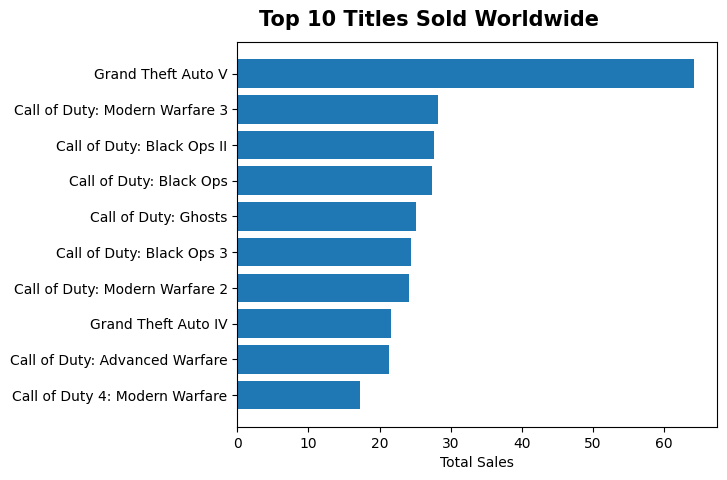

In [20]:
fig_top, ax_top = plt.subplots(figsize=(8, 5))
ax_top.barh(df_top['title'], df_top['total_sales'])
ax_top.invert_yaxis()
ax_top.set_title('Top 10 Titles Sold Worldwide', fontsize=15, y=1.02, x=0.4, weight='bold')
ax_top.set_xlabel('Total Sales')
fig_top.subplots_adjust(left=0.3)

> #### In general, **Grand Theft Auto V** is the best selling title worldwide

### Q2: Which year had the highest sales? Has the industry grown over time?

We group the data by the year in 'release_date' column and sum the total sales

In [21]:
df_trend = df.groupby([df['release_date'].dt.year])['total_sales'].sum().reset_index()

In [22]:
df_trend.head(3)

,release_date,total_sales
0,1985,0.82
1,1986,2.28
2,1987,2.04


Then, we plot the data and annotate the significant years for easier reading

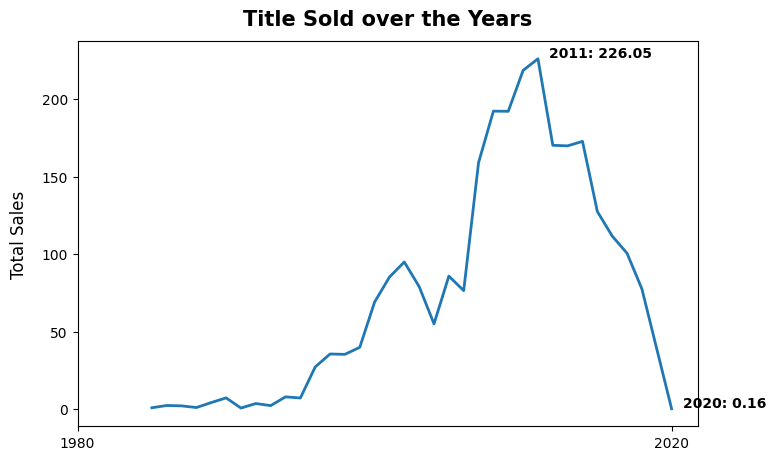

In [23]:
fig_trend, ax_trend = plt.subplots(figsize=(8, 5))
ax_trend.plot(df_trend['release_date'], df_trend['total_sales'], linewidth=2)
ax_trend.set_title('Title Sold over the Years', fontsize=15, y=1.02, x=0.5, weight='bold')
ax_trend.set_ylabel('Total Sales', fontsize=12)
ax_trend.yaxis.set_label_coords(-.08, .5)
ax_trend.set_xticks(ax_trend.get_xticks()[::8])

#annotate significant years
for i, txt in enumerate(df_trend['total_sales']):
    if (df_trend['total_sales'].iloc[i] == df_trend['total_sales'].max() or
        i == df_trend.index.max()):
        ax_trend.annotate("{year}: {sales:n}".format(sales = txt, year = df_trend['release_date'].iloc[i]),
                          (df_trend['release_date'].iloc[i], txt),
                          xycoords='data',
                          xytext=(8, 1),
                          textcoords='offset points',
                          weight='bold')

> #### Although it looks like **2011** was the year there most titles were sold, it is important to notice that there is a great sum of data were missing from the dataset which made the graph **biased**
> #### The industry has **grown** over the time, however it is hard to tell if it is still growing beyond 2011

### Q3: Do any consoles seem to specialize in a particular genre?

We count based on the consoles and genres they are producing throughout the years

In [24]:
df_console = df.value_counts(['console', 'genre']).reset_index()
df_console.set_index('console', inplace=True)

In [25]:
df_console.head(10)

,genre,count
console,,
X360,Shooter,93
PS3,Shooter,91
PS3,Action,82
X360,Action,71
PS3,Role-Playing,56
PS4,Action,53
PS3,Sports,52
PS2,Action,48
PS2,Sports,47


Then, we group them by each console types and their genres as a list

In [26]:
df_console = df_console.groupby(['console'])['genre'].apply(list).reset_index()
df_console.head()

,console,genre
0,3DS,"[Role-Playing, Action, Simulation, Action-Adve..."
1,DC,"[Racing, Platform]"
2,DS,"[Role-Playing, Adventure, Puzzle, Simulation, ..."
3,GB,"[Sports, Action]"
4,GBA,"[Platform, Role-Playing, Puzzle, Adventure, Mi..."


As the genre datatype is object, we need to change it to string for it to be sorted

In [27]:
df_console.info()
#change the genre type as string enabling it to be sort
df_console['genre'] = df_console['genre'].astype('string')

#verify datatype
df_console.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   console  25 non-null     string
 1   genre    25 non-null     object
dtypes: object(1), string(1)
memory usage: 532.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   console  25 non-null     string
 1   genre    25 non-null     string
dtypes: string(2)
memory usage: 532.0 bytes


Now we sort the value and look if there are any console that specialize in a specific genre

In [28]:
#sort the values by genre
df_console.sort_values(by=['genre'], key=lambda x: x.str.len(), inplace=True)
df_console.set_index('console', inplace=True)
df_console.head()

,genre
console,
SNES,['Platform']
GBC,['Adventure']
GB,"['Sports', 'Action']"
PSN,"['Racing', 'Shooter']"
DC,"['Racing', 'Platform']"


> #### Consoles like **SNES** seems like to specialize in **Platform** games, while **GBC** specialize in **Adventure** games

### Q4: What title are popular in one region but flop in another?

We group the dataset by title and filter the other columns to only include sales

In [29]:
df_title = df.groupby(['title'])[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].sum().reset_index()
df_title.head()

,title,na_sales,jp_sales,pal_sales,other_sales
0,'98 Koshien,0.15,0.12,0.10,0.03
1,.hack//G.U. Last Recode,0.10,0.08,0.04,0.03
2,.hack//Infection Part 1,0.49,0.26,0.38,0.13
3,.hack//Mutation Part 2,0.23,0.20,0.18,0.06
4,.hack//Outbreak Part 3,0.14,0.17,0.11,0.04


To find which title is popular but flop in another, we calculate the sales difference by subtracting the region that has the most sales with the region that has the lowest sales

In [30]:
df_title['sales_diff'] = (df_title[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].max(axis=1)
                          - df_title[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].min(axis=1))
df_title.head()

,title,na_sales,jp_sales,pal_sales,other_sales,sales_diff
0,'98 Koshien,0.15,0.12,0.10,0.03,0.12
1,.hack//G.U. Last Recode,0.10,0.08,0.04,0.03,0.07
2,.hack//Infection Part 1,0.49,0.26,0.38,0.13,0.36
3,.hack//Mutation Part 2,0.23,0.20,0.18,0.06,0.17
4,.hack//Outbreak Part 3,0.14,0.17,0.11,0.04,0.13


Then, we sort the values by the sales difference to find the largest one

In [31]:
df_title.sort_values(by='sales_diff', ascending=False, inplace=True)
df_title.head()

,title,na_sales,jp_sales,pal_sales,other_sales,sales_diff
628,Grand Theft Auto V,26.19,1.66,28.14,8.32,26.48
185,Call of Duty: Black Ops,15.77,0.59,8.13,2.92,15.18
193,Call of Duty: Modern Warfare 3,14.61,0.62,10.07,2.87,13.99
192,Call of Duty: Modern Warfare 2,13.53,0.46,7.29,2.87,13.07
187,Call of Duty: Black Ops II,13.26,0.72,10.20,3.48,12.54


> #### **Grand Theft Auto V** is also the title where it is popular in **PAL** and **NA** but flop in **JP**

To further visualize the difference, we plot a bar graph for sales in each region

Text(0.5, 1.02, 'Grand Theft Auto V Sales Difference')

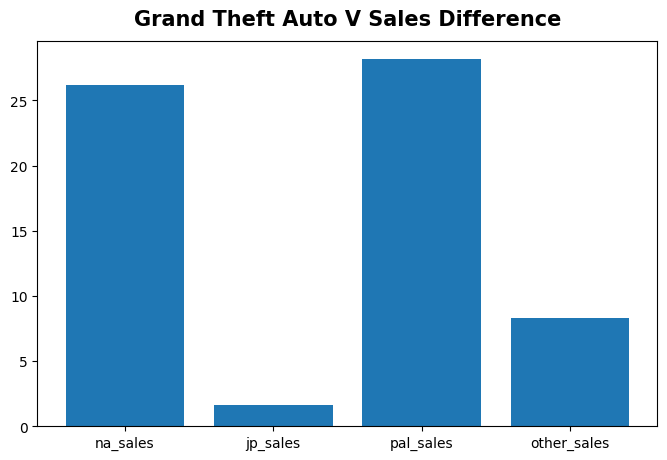

In [32]:
df_flop = df_title.iloc[0]
fig_flop, ax_flop = plt.subplots(figsize=(8,5))
ax_flop.bar(['na_sales', 'jp_sales', 'pal_sales', 'other_sales'], df_flop[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']])
ax_flop.set_title('{title} Sales Difference'.format(title=df_flop['title']), fontsize=15, y=1.02, weight='bold')

***

## Limitations

As mentioned before, the dataset provided has a great amount of data that are empty and null

This introduces bias in the data that might possibly skew the results

***

## Summary

To summarize the analysis:

* Q1: Which title sold the most worldwide?

> * **Grand Theft Auto V** is the best selling title worldwide

* Q2: Which year had the highest sales? Has the industry grown over time

> * **2011** was the year where it has the most sales, with a side note that the data is **biased** causing it difficult to tell if the industry has grown over time

* Q3: Do any consoles seem to specialize in a particular genre?

> * **SNES** console specialize in **Platform** games, while **GBC** console specialize in **Adventure** games

* Q4: What title are popular in one region but flop in another?

> * **Grand Theft Auto V** is popular in region like **PAL** and **NA** but it was a flop in **JP**

***